In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [9]:
df=pd.read_csv(r"https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv")

In [10]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [12]:
x=df.drop(columns='Strength',axis=1)
y=df.iloc[:,-1]

In [13]:
## train test split data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## linear regression without transformation 

In [18]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=lr.predict(x_test)

In [25]:
r2_score(y_test,y_pred)

0.627553179231485

In [26]:
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,cv=10,scoring="r2"))

0.27820729160873814

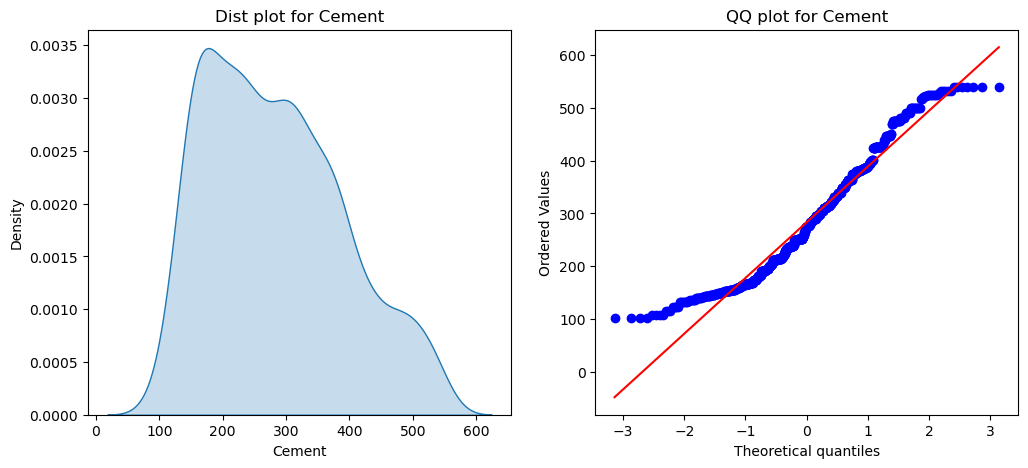

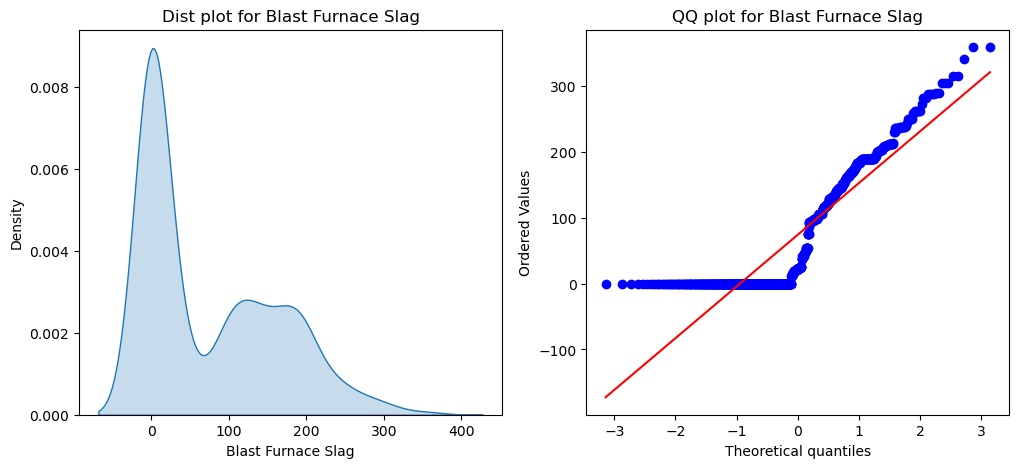

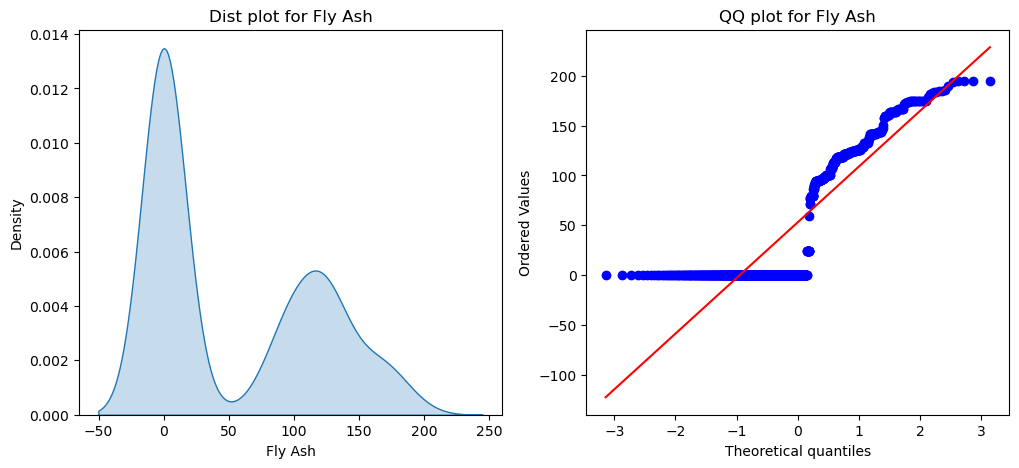

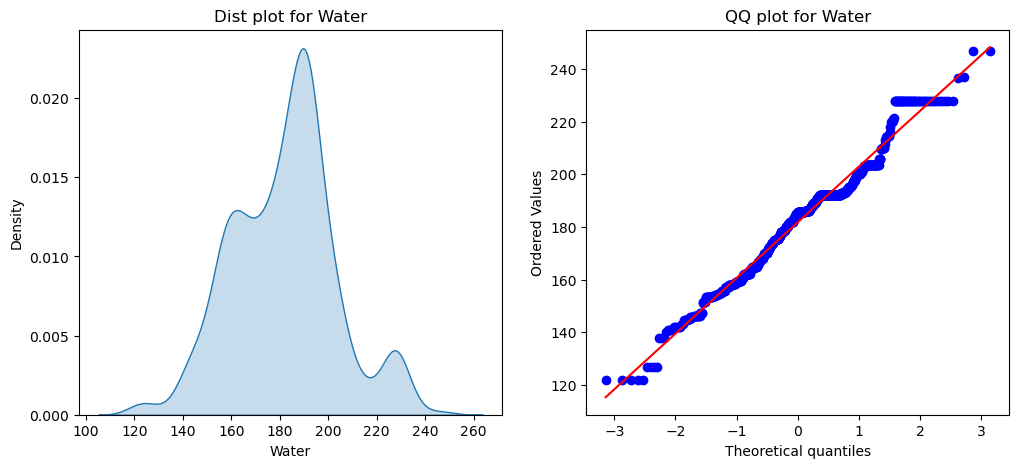

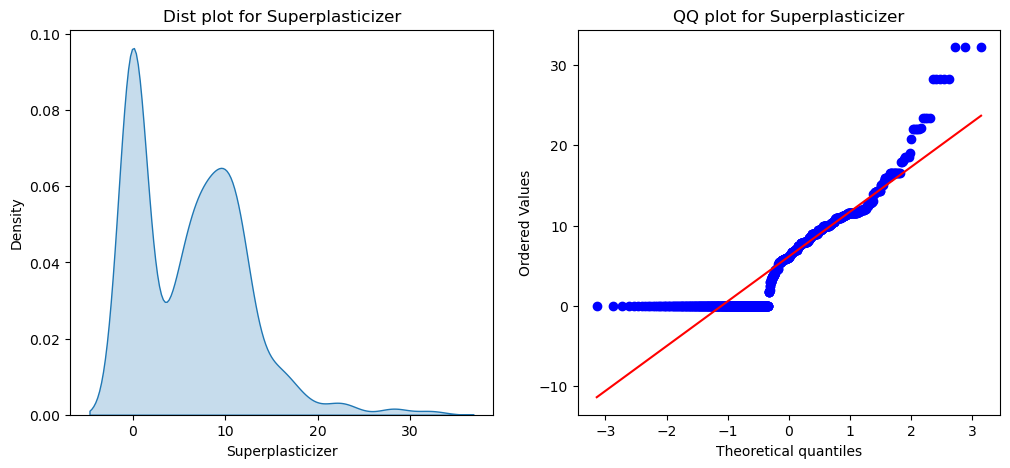

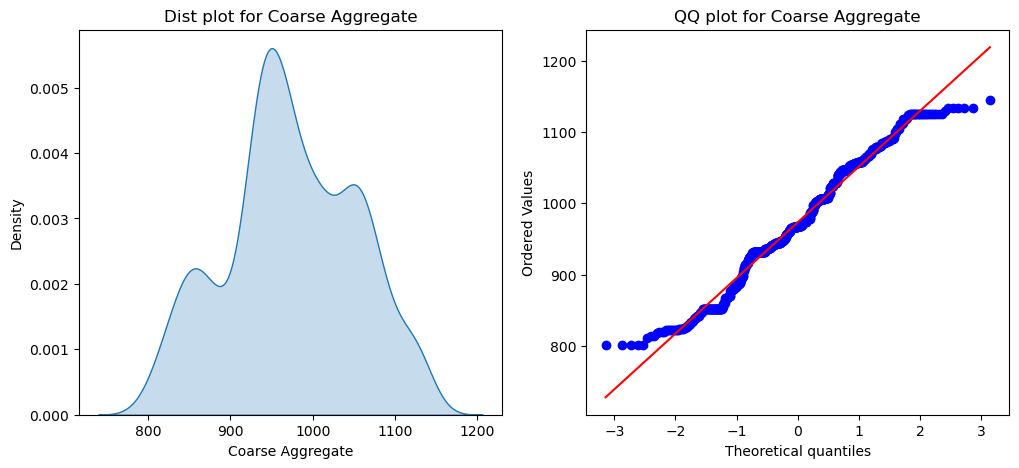

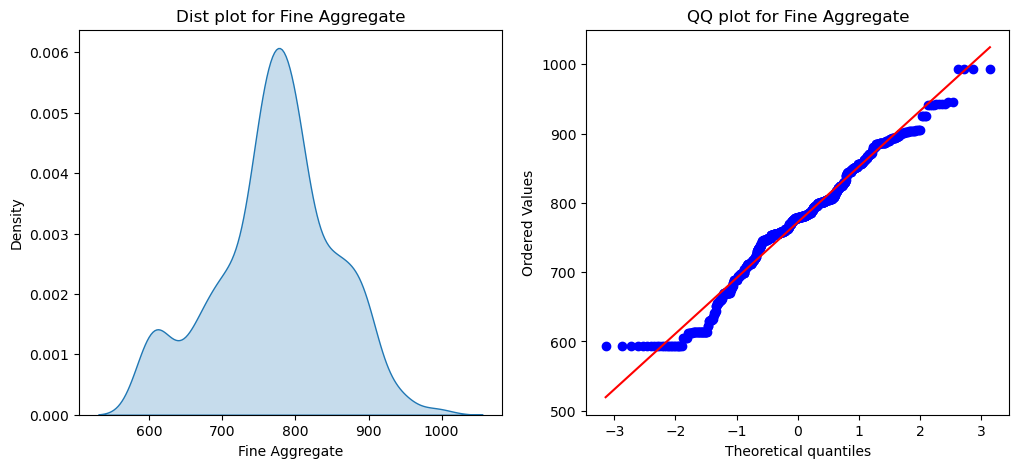

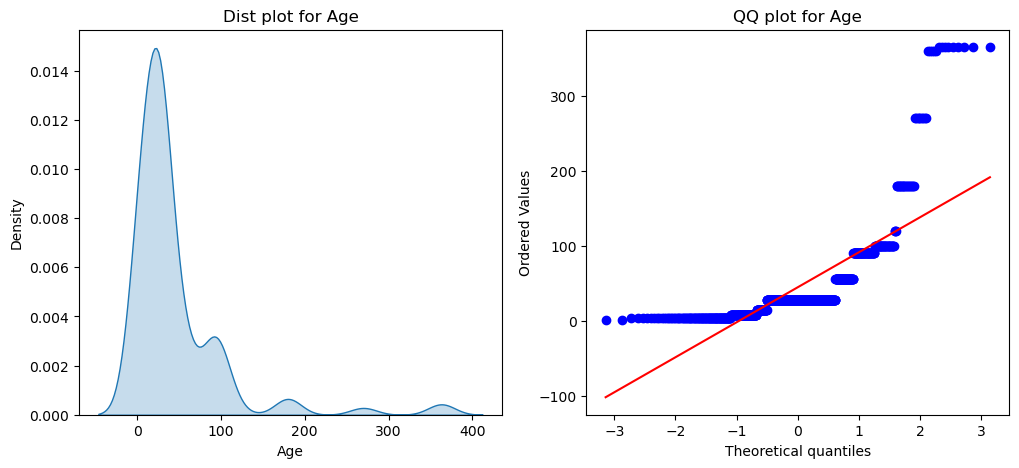

In [33]:
for item in x_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title("Dist plot for {}".format(item))
    sns.kdeplot(x_train[item],shade=True)
    
    plt.subplot(122)
    stats.probplot(x_train[item],plot=plt)
    plt.title("QQ plot for {}".format(item))
    plt.show()

In [35]:
## using box-cox power transformer 

In [38]:
pr=PowerTransformer(method="box-cox")

x_train_transform=pr.fit_transform(x_train+0.000001)
x_test_transform=pr.transform(x_test+0.000001)
pd.DataFrame({"Cols":x_train.columns,"Box_cox_lambdas":pr.lambdas_})

,Cols,Box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [40]:
lr=LinearRegression()

lr.fit(x_train_transform,y_train)
y_pred=lr.predict(x_test_transform)

r2_score(y_test,y_pred)


0.8047825006181187

In [45]:
pr=PowerTransformer(method="box-cox")
x_transform=pr.fit_transform(x+0.0001)

lr=LinearRegression()
lr.fit(x_transform,y)

np.mean(cross_val_score(lr,x_transform,y,cv=10,scoring="r2"))

0.6482082304075789

## before and after transformer graph plot

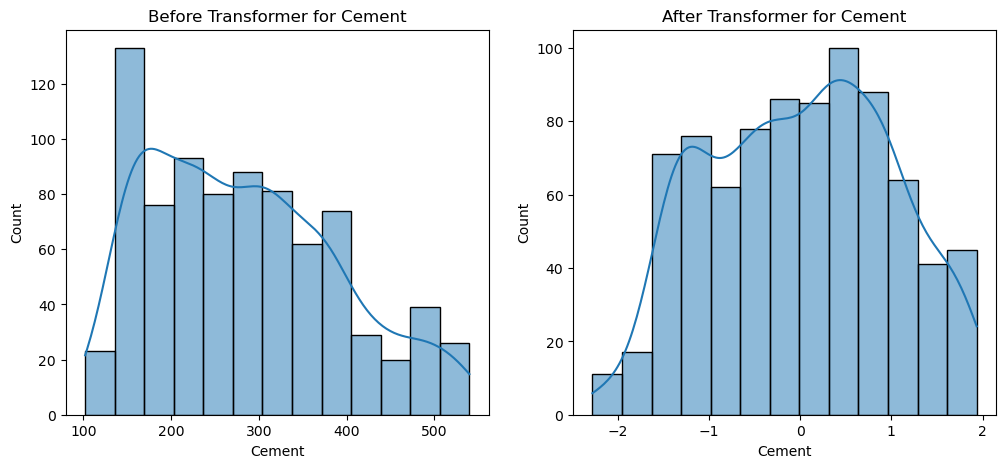

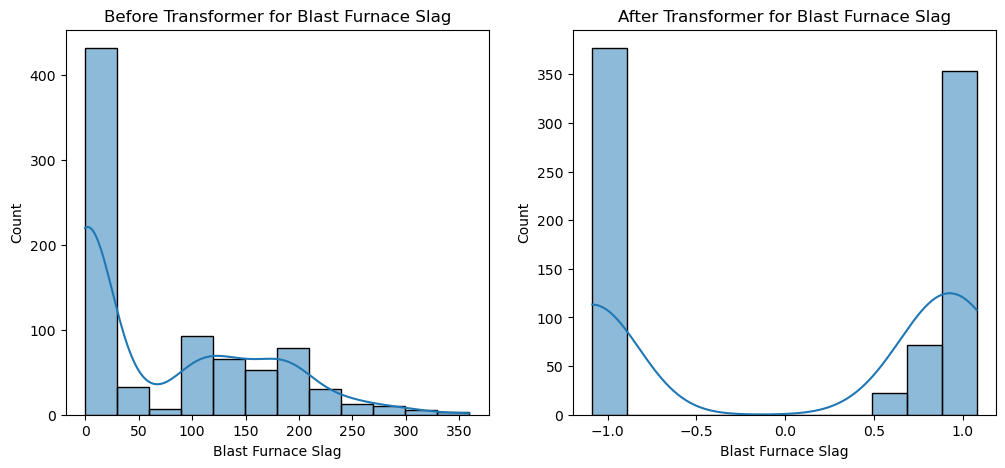

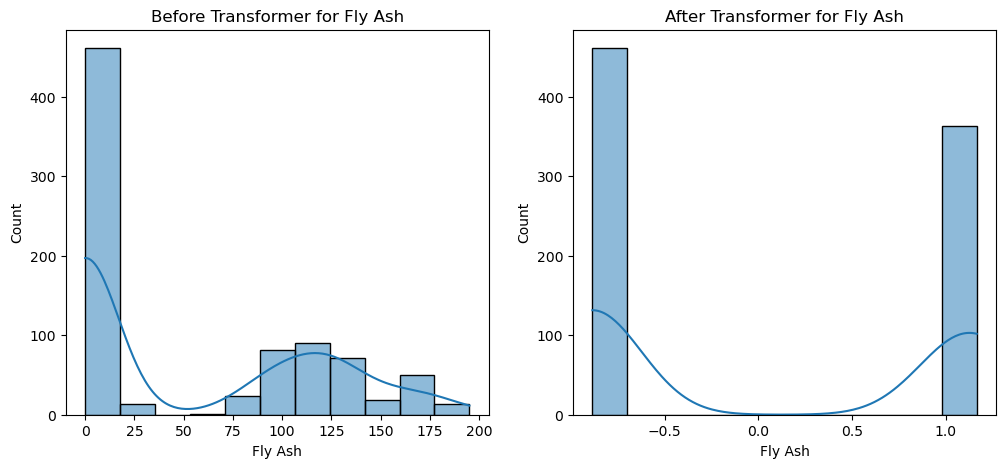

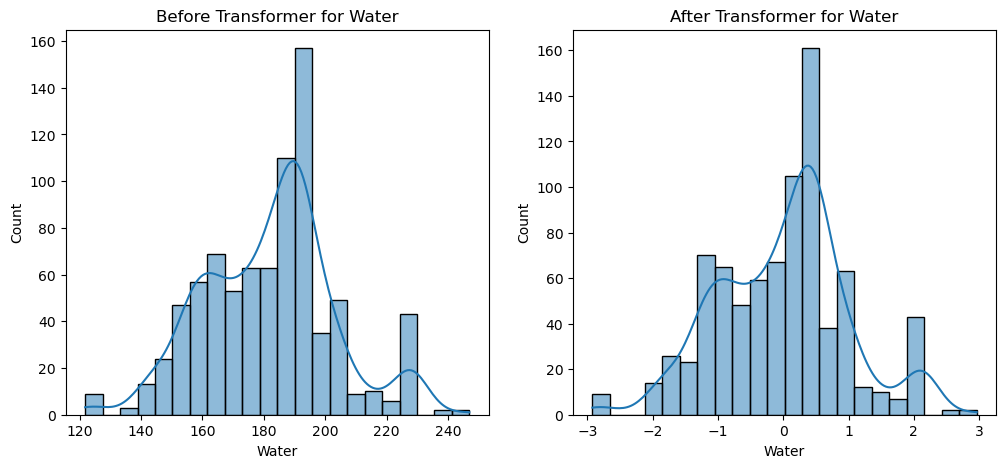

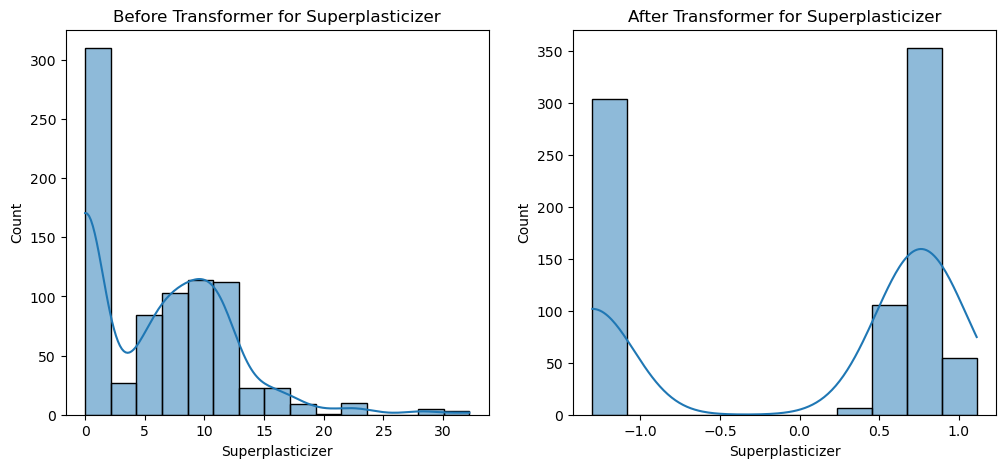

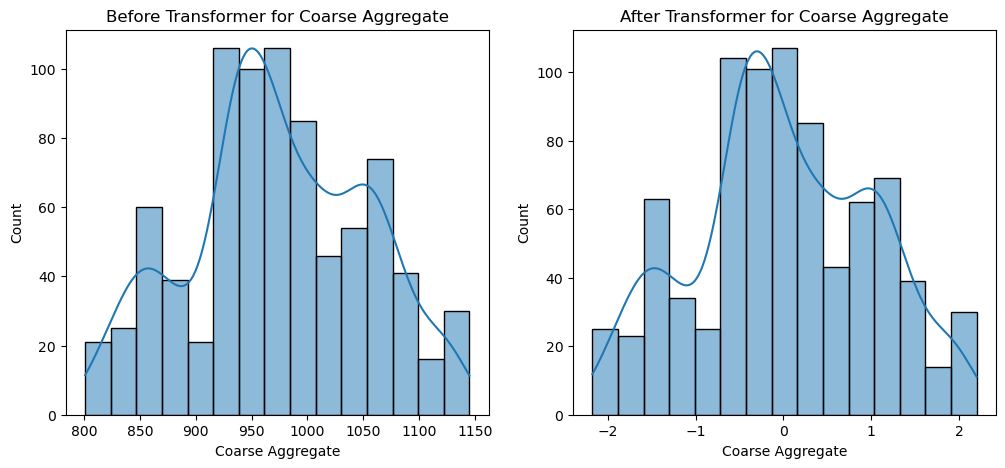

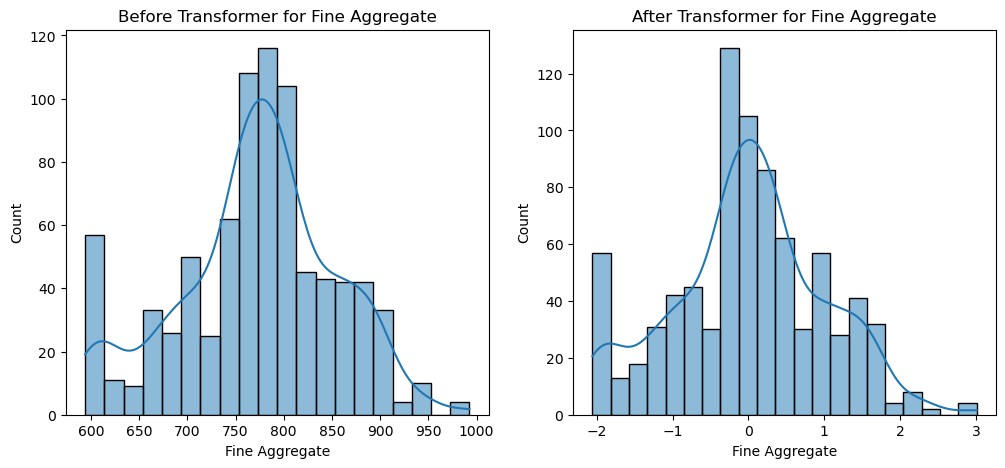

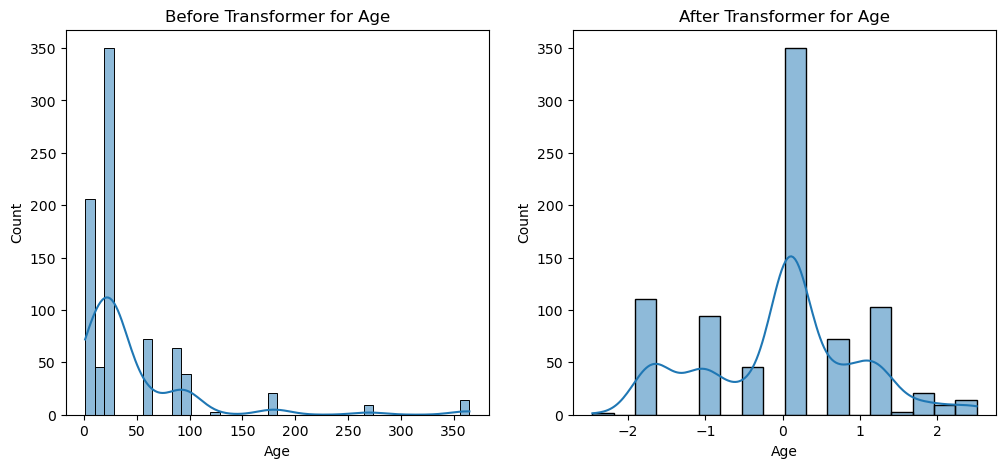

In [56]:
x_train_transform=pd.DataFrame(x_train_transform,columns=x_train.columns)
for item in x_train_transform.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title("Before Transformer for {}".format(item))
    sns.histplot(x_train[item],kde=True)
    
    plt.subplot(122)
    plt.title("After Transformer for {}".format(item))
    sns.histplot(x_train_transform[item],kde=True)
    plt.show()
